In [ ]:
# Acknowledgment:
# Portions of this code were created with the assistance of OpenAI's ChatGPT 4o model,
# which provided guidance on visualization improvements and general structure.

In [ ]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 32.7 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
from pybaseball import statcast

# Load Statcast data for a specific season (2023 as an example)
#data = statcast(start_dt="2024-04-01", end_dt="2024-09-30")
data = pd.read_csv("mlb_pitch_data.csv")

# Display basic information about the dataset
data.info()

# Preview the first few rows of the data
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5968 entries, 0 to 5967
Data columns (total 94 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pitch_type                       5968 non-null   object 
 1   game_date                        5968 non-null   object 
 2   release_speed                    5968 non-null   float64
 3   release_pos_x                    5968 non-null   float64
 4   release_pos_z                    5968 non-null   float64
 5   player_name                      5968 non-null   object 
 6   batter                           5968 non-null   int64  
 7   pitcher                          5968 non-null   int64  
 8   events                           1543 non-null   object 
 9   description                      5968 non-null   object 
 10  spin_dir                         0 non-null      float64
 11  spin_rate_deprecated             0 non-null      float64
 12  break_angle_deprecat

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FF,2024-09-30,97.4,-2.10,4.88,"Díaz, Edwin",518595,621242,field_out,hit_into_play,...,7,7,8,Standard,Strategic,232.0,-0.142,-0.275,68.81042,7.28300
1,SL,2024-09-30,90.7,-2.14,5.06,"Díaz, Edwin",518595,621242,NaN,ball,...,7,7,8,Standard,Strategic,201.0,0.000,0.041,NaN,NaN
2,SL,2024-09-30,91.1,-2.07,5.14,"Díaz, Edwin",518595,621242,NaN,swinging_strike,...,7,7,8,Standard,Strategic,210.0,0.000,-0.067,71.16004,8.88615
3,SL,2024-09-30,91.3,-2.05,5.07,"Díaz, Edwin",518595,621242,NaN,ball,...,7,7,8,Standard,Strategic,212.0,0.000,0.014,NaN,NaN
4,SL,2024-09-30,89.1,-2.13,5.15,"Díaz, Edwin",518595,621242,NaN,swinging_strike,...,7,7,8,Standard,Standard,216.0,0.000,-0.045,71.68666,9.03428


In [ ]:
relevant_columns = [
    'pitch_type', 'release_speed', 'release_spin_rate', 'plate_x', 'plate_z',
    'player_name', 'batter', 'pitcher', 'inning', 'balls', 'strikes',
    'outs_when_up', 'events', 'description'
]

data_reduced = pd.read_csv("mlb_pitch_data_cleaned.csv")
#data_reduced.to_csv('mlb_pitch_data_cleaned.csv', index=False)

data_reduced.info()
data_reduced.head()

ParserError: Error tokenizing data. C error: EOF inside string starting at row 56214

<Axes: title={'center': 'Pitch Type Distribution'}, xlabel='pitch_type'>

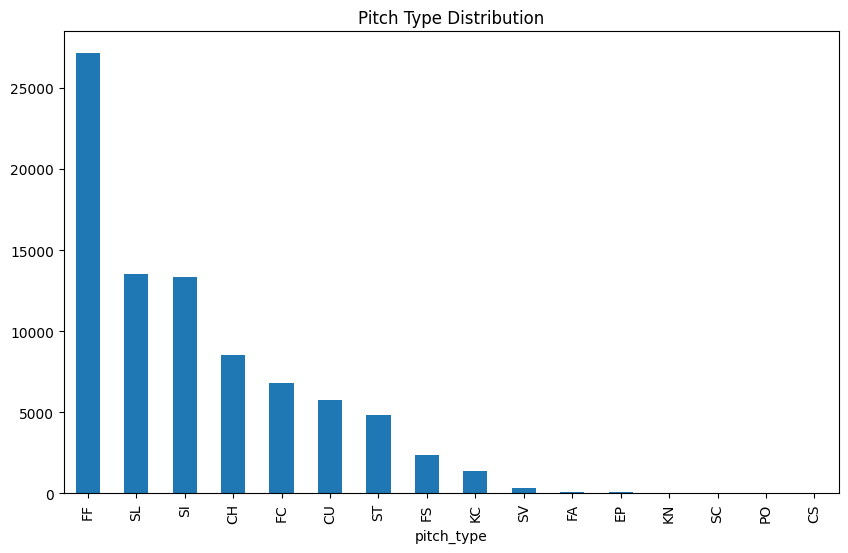

In [ ]:
# Count the frequency of each pitch type
pitch_type_distribution = data_reduced['pitch_type'].value_counts()

# Plot pitch type distribution
pitch_type_distribution.plot(kind='bar', title='Pitch Type Distribution', figsize=(10, 6))

<Axes: title={'center': 'Pitch Speed Distribution'}, ylabel='Frequency'>

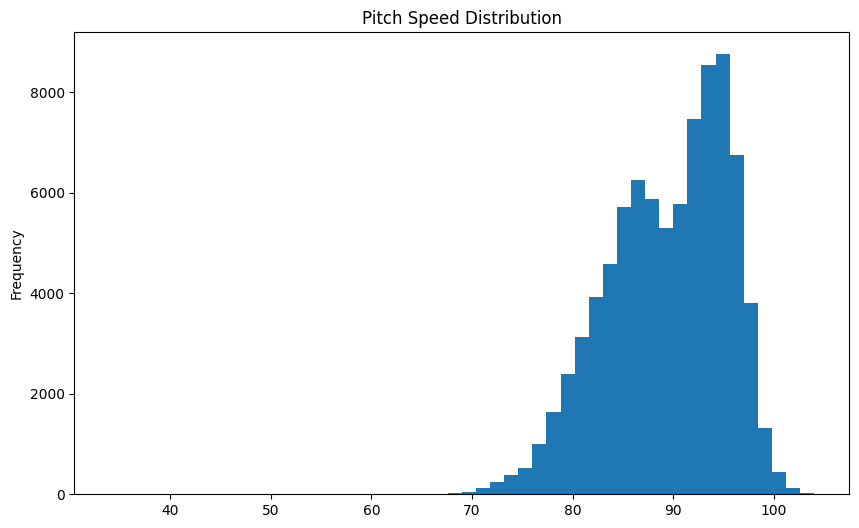

In [ ]:
# Plot distribution of release speeds
data_reduced['release_speed'].plot(kind='hist', bins=50, title='Pitch Speed Distribution', figsize=(10, 6))

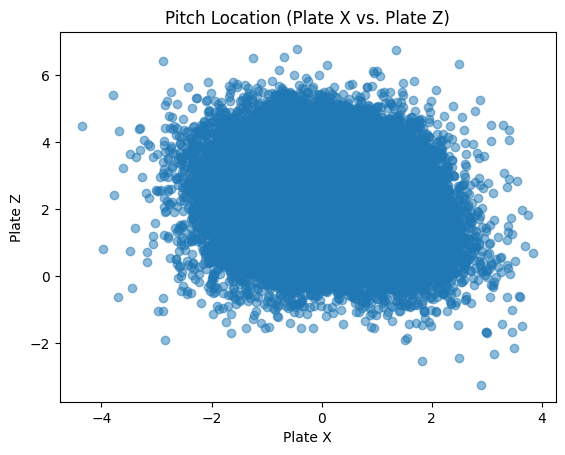

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of pitch location (plate_x and plate_z)
plt.scatter(data_reduced['plate_x'], data_reduced['plate_z'], alpha=0.5)
plt.title('Pitch Location (Plate X vs. Plate Z)')
plt.xlabel('Plate X')
plt.ylabel('Plate Z')
plt.show()

<Axes: title={'center': 'Pitch Outcome Distribution'}, xlabel='description'>

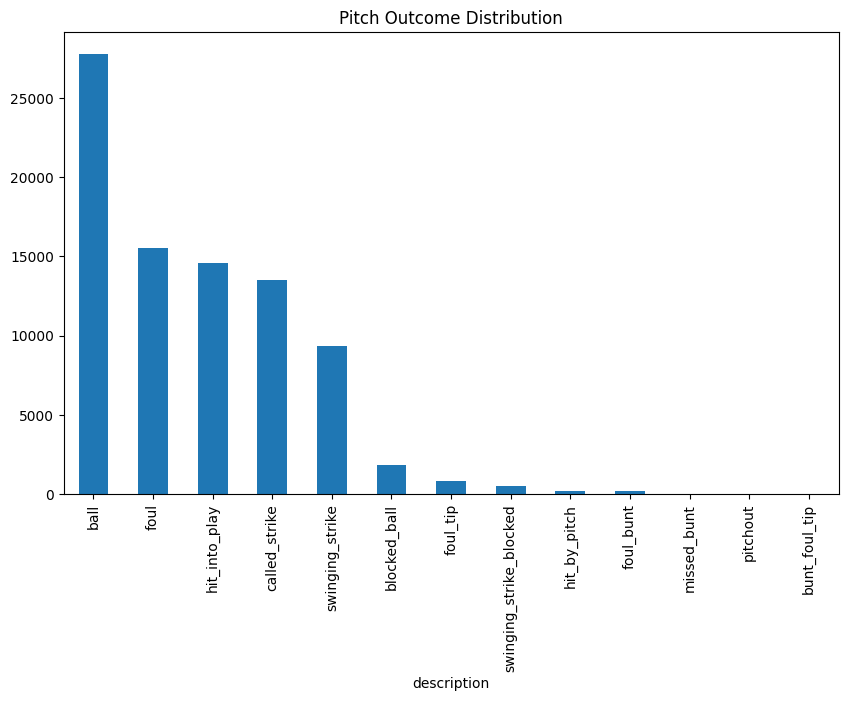

In [ ]:
# Explore pitch outcomes (description) distribution
pitch_outcome_distribution = data_reduced['description'].value_counts()

# Plot pitch outcome distribution
pitch_outcome_distribution.plot(kind='bar', title='Pitch Outcome Distribution', figsize=(10, 6))

In [ ]:
# Create lag feature to get the previous pitch type in the sequence
data_reduced.loc[:, 'prev_pitch'] = data_reduced['pitch_type'].shift(1)

# Create a new column to check if the same pitcher threw the previous pitch
data_reduced.loc[:, 'same_pitcher'] = data_reduced['pitcher'] == data_reduced['pitcher'].shift(1)

# Filter data where the previous pitch was thrown by the same pitcher
data_filtered = data_reduced[data_reduced['same_pitcher']]

In [ ]:
# Group by previous pitch and current pitch to calculate outcome distributions
sequence_outcomes = data_filtered.groupby(['prev_pitch', 'pitch_type'])['description'].value_counts(normalize=True).unstack()

# Display the sequence outcomes
sequence_outcomes.head()

description                ball  blocked_ball  bunt_foul_tip  called_strike  \
prev_pitch pitch_type                                                         
CH         CH          0.400209      0.054859            NaN       0.101881   
           CU          0.401189      0.062407            NaN       0.243685   
           FC          0.361809      0.003350            NaN       0.201005   
           FF          0.374434      0.004902            NaN       0.191176   
           FS          0.200000           NaN            NaN       0.200000   

description                foul  foul_bunt  foul_tip  hit_by_pitch  \
prev_pitch pitch_type                                                
CH         CH          0.141588   0.001045  0.010449      0.000522   
           CU          0.145617        NaN  0.005944      0.004458   
           FC          0.221106   0.001675  0.005025      0.005025   
           FF          0.268477   0.001508  0.012443      0.001508   
           FS          0.200000        NaN       NaN           NaN   

description            hit_into_play  missed_bunt  pitchout  swinging_strike  \
prev_pitch pitch_type                                                          
CH         CH               0.086729     0.000522       NaN         0.195925   
           CU               0.059435          NaN       NaN         0.066865   
           FC               0.105528          NaN       NaN         0.093802   
           FF               0.082579     0.000377       NaN         0.062594   
           FS                    NaN          NaN       NaN         0.400000   

description            swinging_strike_blocked  
prev_pitch pitch_type                           
CH         CH                         0.006270  
           CU                         0.010401  
           FC                         0.001675  
           FF                              NaN  
           FS                              NaN

<Axes: title={'center': 'Outcome Distribution: Fastball to Slider'}, xlabel='description'>

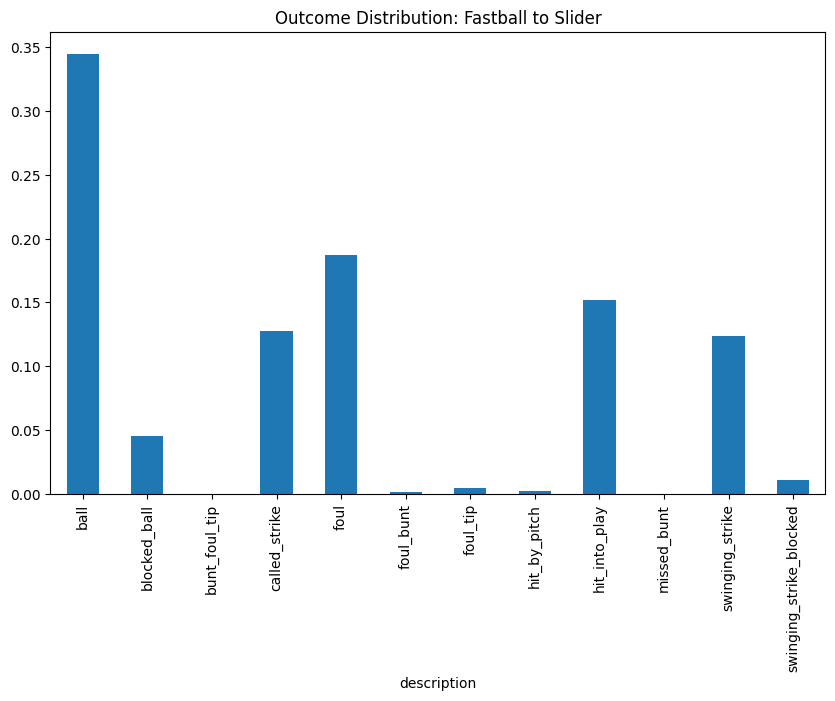

In [ ]:
# Filter out sequences with enough data (e.g., more than 500 occurrences)
common_sequences = data_filtered.groupby(['prev_pitch', 'pitch_type']).filter(lambda x: len(x) > 500)

# Group by previous pitch and current pitch to calculate outcome distributions
sequence_outcomes = common_sequences.groupby(['prev_pitch', 'pitch_type'])['description'].value_counts(normalize=True).unstack()

# Plot the outcome probabilities for a specific sequence (e.g., Fastball to Slider)
sequence_outcomes.loc[('FF', 'SL')].plot(kind='bar', title='Outcome Distribution: Fastball to Slider', figsize=(10, 6))

In [ ]:
# Group the data by previous pitch and current pitch, and count occurrences
sequence_counts = data_filtered.groupby(['prev_pitch', 'pitch_type']).size().reset_index(name='count')

# Sort the sequences by their count in descending order
sequence_counts_sorted = sequence_counts.sort_values(by='count', ascending=False)

# Get the top 10 most common sequences
top_10_sequences = sequence_counts_sorted.head(10)

# Display the top 10 sequences
print(top_10_sequences)

    prev_pitch pitch_type  count
44          FF         FF  10933
93          SI         SI   4730
100         SL         FF   4376
106         SL         SL   4267
51          FF         SL   4140
3           CH         FF   2652
41          FF         CH   2636
0           CH         CH   1914
18          CU         FF   1856
105         SL         SI   1815


In [ ]:
# Filter data for the top 10 most common sequences
top_sequences = data_filtered[
    (data_filtered['prev_pitch'] == 'FF') & (data_filtered['pitch_type'] == 'FF') |
    (data_filtered['prev_pitch'] == 'SI') & (data_filtered['pitch_type'] == 'SI') |
    (data_filtered['prev_pitch'] == 'SL') & (data_filtered['pitch_type'] == 'FF') |
    (data_filtered['prev_pitch'] == 'SL') & (data_filtered['pitch_type'] == 'SL') |
    (data_filtered['prev_pitch'] == 'FF') & (data_filtered['pitch_type'] == 'SL') |
    (data_filtered['prev_pitch'] == 'CH') & (data_filtered['pitch_type'] == 'FF') |
    (data_filtered['prev_pitch'] == 'FF') & (data_filtered['pitch_type'] == 'CH') |
    (data_filtered['prev_pitch'] == 'CH') & (data_filtered['pitch_type'] == 'CH') |
    (data_filtered['prev_pitch'] == 'CU') & (data_filtered['pitch_type'] == 'FF') |
    (data_filtered['prev_pitch'] == 'SL') & (data_filtered['pitch_type'] == 'SI')
]

# Group by previous and current pitch, then analyze outcome distribution
sequence_outcomes_top = top_sequences.groupby(['prev_pitch', 'pitch_type'])['description'].value_counts(normalize=True).unstack()

# Display the sequence outcomes for the top 10 sequences
sequence_outcomes_top.head()

description                ball  blocked_ball  bunt_foul_tip  called_strike  \
prev_pitch pitch_type                                                         
CH         CH          0.400209      0.054859            NaN       0.101881   
           FF          0.374434      0.004902            NaN       0.191176   
CU         FF          0.304418      0.002694            NaN       0.162716   
FF         CH          0.371775      0.050455            NaN       0.096358   
           FF          0.356078      0.003659            NaN       0.167840   

description                foul  foul_bunt  foul_tip  hit_by_pitch  \
prev_pitch pitch_type                                                
CH         CH          0.141588   0.001045  0.010449      0.000522   
           FF          0.268477   0.001508  0.012443      0.001508   
CU         FF          0.279634   0.002155  0.013470      0.001616   
FF         CH          0.193854   0.000379  0.007967      0.000759   
           FF          0.215860   0.002470  0.015641      0.001921   

description            hit_into_play  missed_bunt  swinging_strike  \
prev_pitch pitch_type                                                
CH         CH               0.086729     0.000522         0.195925   
           FF               0.082579     0.000377         0.062594   
CU         FF               0.163254     0.000539         0.069504   
FF         CH               0.149848          NaN         0.122914   
           FF               0.121010     0.000183         0.115339   

description            swinging_strike_blocked  
prev_pitch pitch_type                           
CH         CH                          0.00627  
           FF                              NaN  
CU         FF                              NaN  
FF         CH                          0.00569  
           FF                              NaN

In [ ]:
# Replace missing values with 0 in relevant columns
sequence_outcomes_top.fillna(0, inplace=True)
sequence_outcomes_top = sequence_outcomes_top.round(4)
sequence_outcomes_top.head()

description              ball  blocked_ball  bunt_foul_tip  called_strike  \
prev_pitch pitch_type                                                       
CH         CH          0.4002        0.0549            0.0         0.1019   
           FF          0.3744        0.0049            0.0         0.1912   
CU         FF          0.3044        0.0027            0.0         0.1627   
FF         CH          0.3718        0.0505            0.0         0.0964   
           FF          0.3561        0.0037            0.0         0.1678   

description              foul  foul_bunt  foul_tip  hit_by_pitch  \
prev_pitch pitch_type                                              
CH         CH          0.1416     0.0010    0.0104        0.0005   
           FF          0.2685     0.0015    0.0124        0.0015   
CU         FF          0.2796     0.0022    0.0135        0.0016   
FF         CH          0.1939     0.0004    0.0080        0.0008   
           FF          0.2159     0.0025    0.0156        0.0019   

description            hit_into_play  missed_bunt  swinging_strike  \
prev_pitch pitch_type                                                
CH         CH                 0.0867       0.0005           0.1959   
           FF                 0.0826       0.0004           0.0626   
CU         FF                 0.1633       0.0005           0.0695   
FF         CH                 0.1498       0.0000           0.1229   
           FF                 0.1210       0.0002           0.1153   

description            swinging_strike_blocked  
prev_pitch pitch_type                           
CH         CH                           0.0063  
           FF                           0.0000  
CU         FF                           0.0000  
FF         CH                           0.0057  
           FF                           0.0000

In [ ]:
# Export the sequence outcomes data to CSV
sequence_outcomes_top.to_csv('top_pitch_sequences_outcomes_cleaned.csv', index=True)

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn')

<ipython-input-17-efa49a5abcf4>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
# Load the cleaned dataset
file_path = 'top_pitch_sequences_outcomes_cleaned.csv'
data = pd.read_csv(file_path)

# Display first few rows
data.head()

,prev_pitch,pitch_type,ball,blocked_ball,bunt_foul_tip,called_strike,foul,foul_bunt,foul_tip,hit_by_pitch,hit_into_play,missed_bunt,swinging_strike,swinging_strike_blocked
0,CH,CH,0.4002,0.0549,0.0,0.1019,0.1416,0.0010,0.0104,0.0005,0.0867,0.0005,0.1959,0.0063
1,CH,FF,0.3744,0.0049,0.0,0.1912,0.2685,0.0015,0.0124,0.0015,0.0826,0.0004,0.0626,0.0000
2,CU,FF,0.3044,0.0027,0.0,0.1627,0.2796,0.0022,0.0135,0.0016,0.1633,0.0005,0.0695,0.0000
3,FF,CH,0.3718,0.0505,0.0,0.0964,0.1939,0.0004,0.0080,0.0008,0.1498,0.0000,0.1229,0.0057
4,FF,FF,0.3561,0.0037,0.0,0.1678,0.2159,0.0025,0.0156,0.0019,0.1210,0.0002,0.1153,0.0000


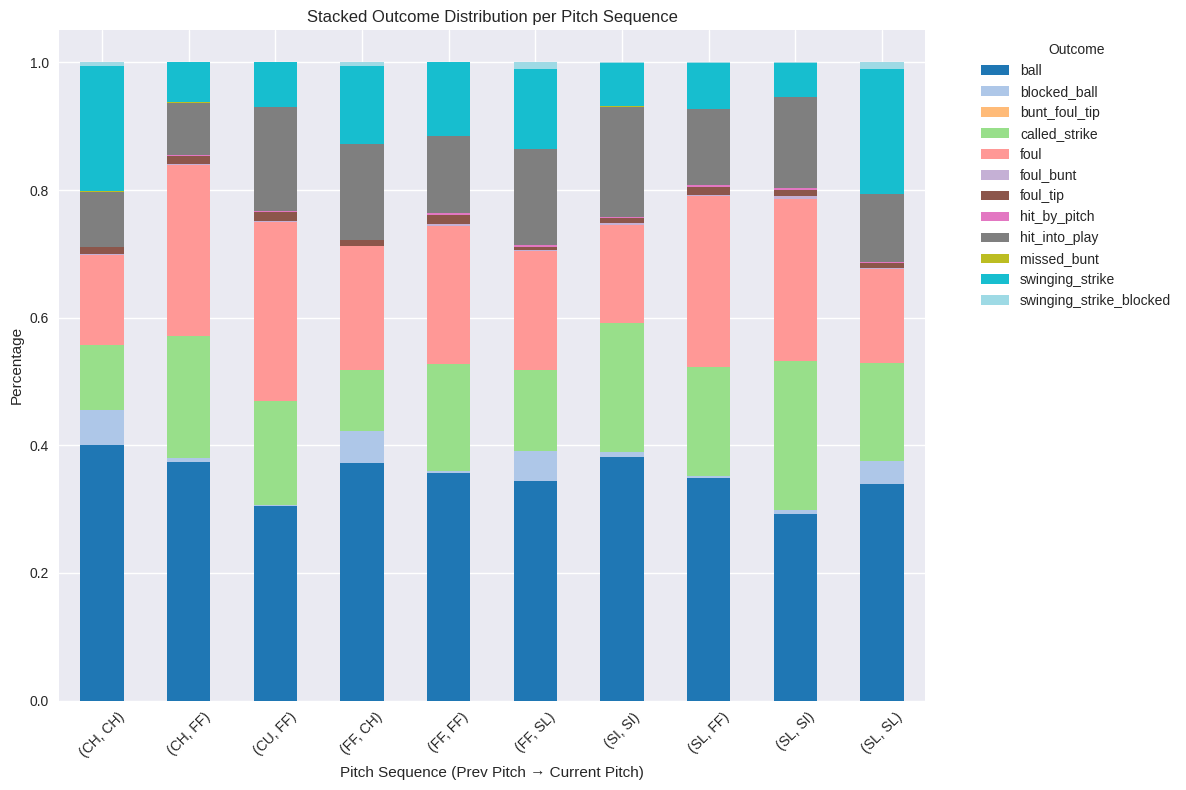

In [ ]:
# Create a stacked bar chart for outcome distribution per pitch sequence
pivot_data = data.set_index(['prev_pitch', 'pitch_type'])

# Plotting the stacked bar chart with each outcome stacked
pivot_data[outcome_columns].plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

plt.title('Stacked Outcome Distribution per Pitch Sequence')
plt.xlabel('Pitch Sequence (Prev Pitch → Current Pitch)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()